<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2003%20%3A%20Feedforward%20Artificial%20Neural%20Networks/01_ann_code_for_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST CLASSIFICATION USING ARTIFICIAL NEURAL NETWORKS**

ANN CODE PREPERATIONS

+ Load the Dataset.
  + Here using the MNIST Dataset.
  + It contains 10 classes.
  + Already included in Tensroflow.

+ Build the Model.
  + Sequential dense layers ending with multiclass logistic regression.

+ Compile and Train the Model.
  + compile the model
  + train the model.

+ Evaluate the Model
+ Make Predictions.

IMPORT LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow import keras

LOAD THE DATA

In [9]:
## load the data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Train Images Shape :--", train_images.shape)
print("Train Labels Shape :--", train_labels.shape)
print("Test Images Shape :--", test_images.shape)
print("Test Labels Shape :--", test_labels.shape)

Train Images Shape :-- (60000, 28, 28)
Train Labels Shape :-- (60000,)
Test Images Shape :-- (10000, 28, 28)
Test Labels Shape :-- (10000,)


In [11]:
## now transform the train images and test images to `[0-1]`
train_images = train_images / 255
test_images = test_images / 255

In [15]:
train_images.shape[1:3]

(28, 28)

BUILD THE MODEL

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = train_images.shape[1:3]),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


COMPILE AND TRAIN THE MODEL

In [21]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

r = model.fit(train_images, train_labels, validation_data = (test_images, test_labesl), epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.1201 - val_accuracy: 0.9805
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.1134 - val_accuracy: 0.9797
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0153 - accuracy: 0.9946 - val_loss: 0.1166 - val_accuracy: 0.9804
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0148 - accuracy: 0.9949 - val_loss: 0.1062 - val_accuracy: 0.9816
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0164 - accuracy: 0.9944 - val_loss: 0.1151 - val_accuracy: 0.9815
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0158 - accuracy: 0.9948 - val_loss: 0.1143 - val_accuracy: 0.9821
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.1056 - val_accuracy:

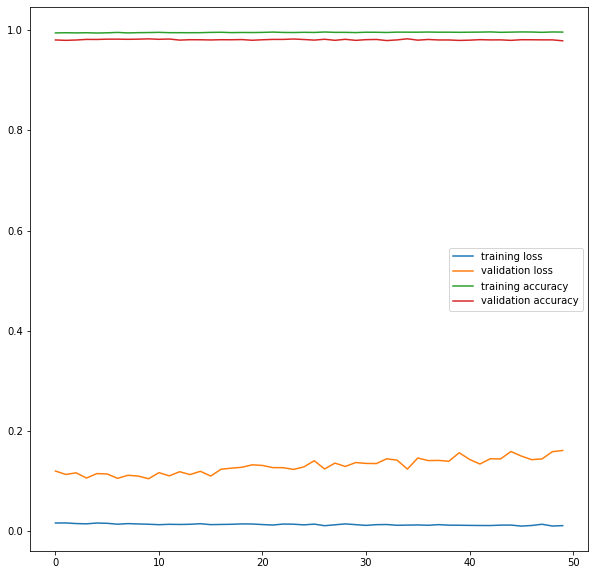

In [22]:
## plot the losses and accuracies.
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.plot(r.history["loss"], label = "training loss")
plt.plot(r.history["val_loss"], label = "validation loss")
plt.plot(r.history["accuracy"], label = "training accuracy")
plt.plot(r.history["val_accuracy"], label = "validation accuracy")
plt.legend();

EVALUATE THE MODEL

In [26]:
print("Train Score :--", model.evaluate(train_images, train_labels))
print("Test Score :--", model.evaluate(test_images,test_labels))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0012 - accuracy: 0.9997
Train Score :-- [0.0012236147886142135, 0.9996833205223083]
313/313 [==============================] - 1s 2ms/step - loss: 0.1612 - accuracy: 0.9788
Test Score :-- [0.16119657456874847, 0.9787999987602234]


***